In [1]:
# installing Panda
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 77.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 119.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 67.5 MB/s eta 0:00:00


In [4]:
#Creating a data frame
import pandas as pd

# Load the dataset
df = pd.read_csv('data/housing-prices-data/house-price-20211124T154130Z-001/house-price/house_prices_records.csv')


In [5]:
# Display the first few rows of the DataFrame
print(df.head())

# Check the data types and missing values
print(df.info())

# Summary statistics
print(df.describe())


   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.

In [10]:
#installing matplotlib and seaborn
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.3 MB/s eta 0:00:00


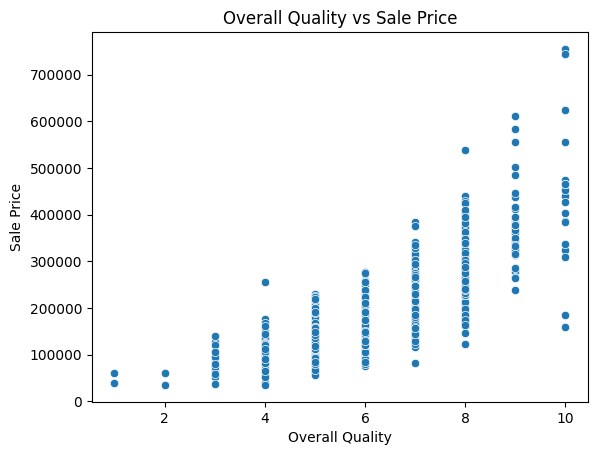

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example visualization (replace with relevant plots)
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


In [13]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert specific columns to numeric
for column in non_numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate correlation matrix
correlation_matrix = df.corr()


Non-numeric columns: Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')


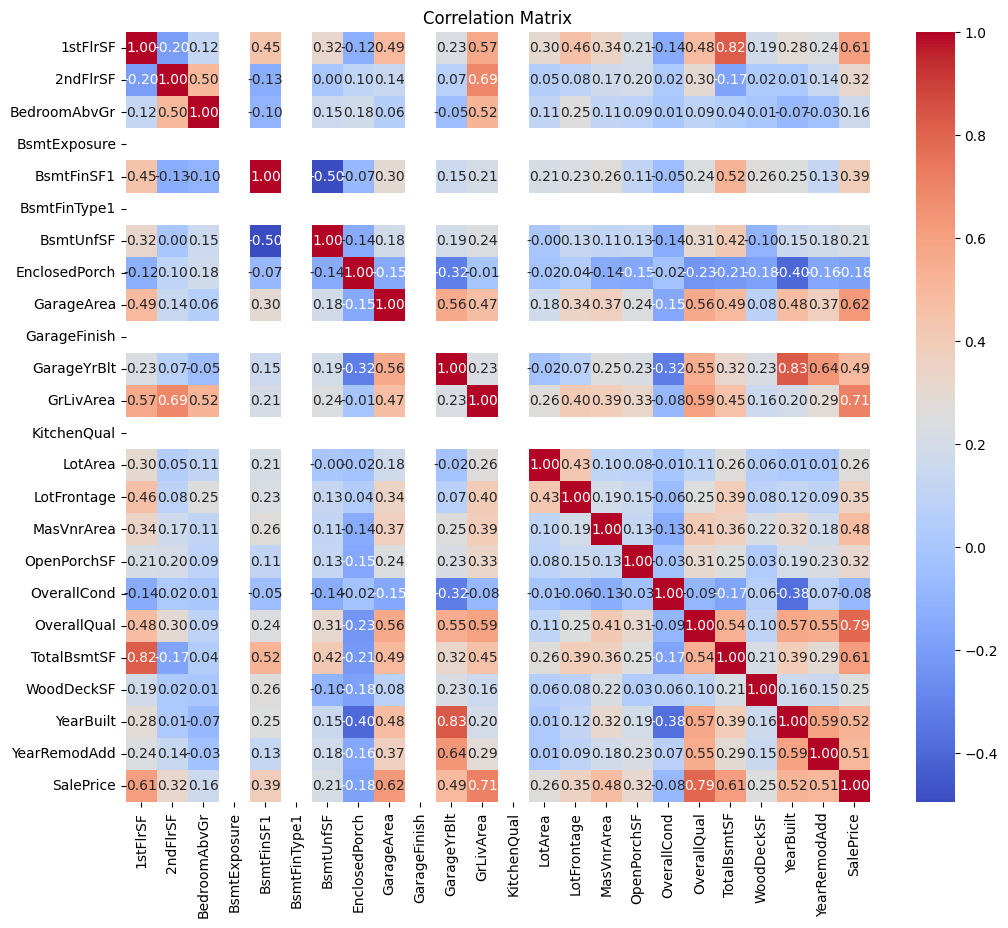

In [14]:
# Calculate correlations
correlation_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


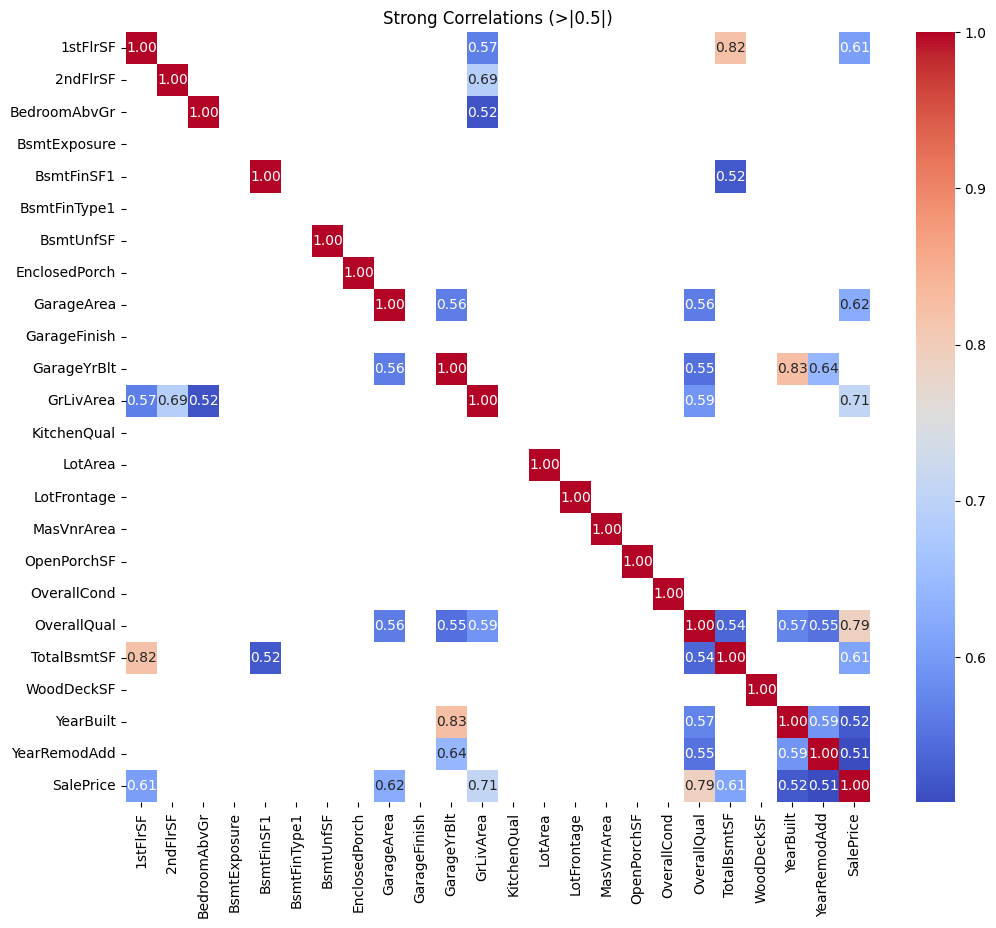

In [15]:
# Define the threshold for strong correlation
threshold = 0.5

# Filter the correlation matrix to show only strong correlations
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# Plot the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Strong Correlations (>|0.5|)')
plt.show()


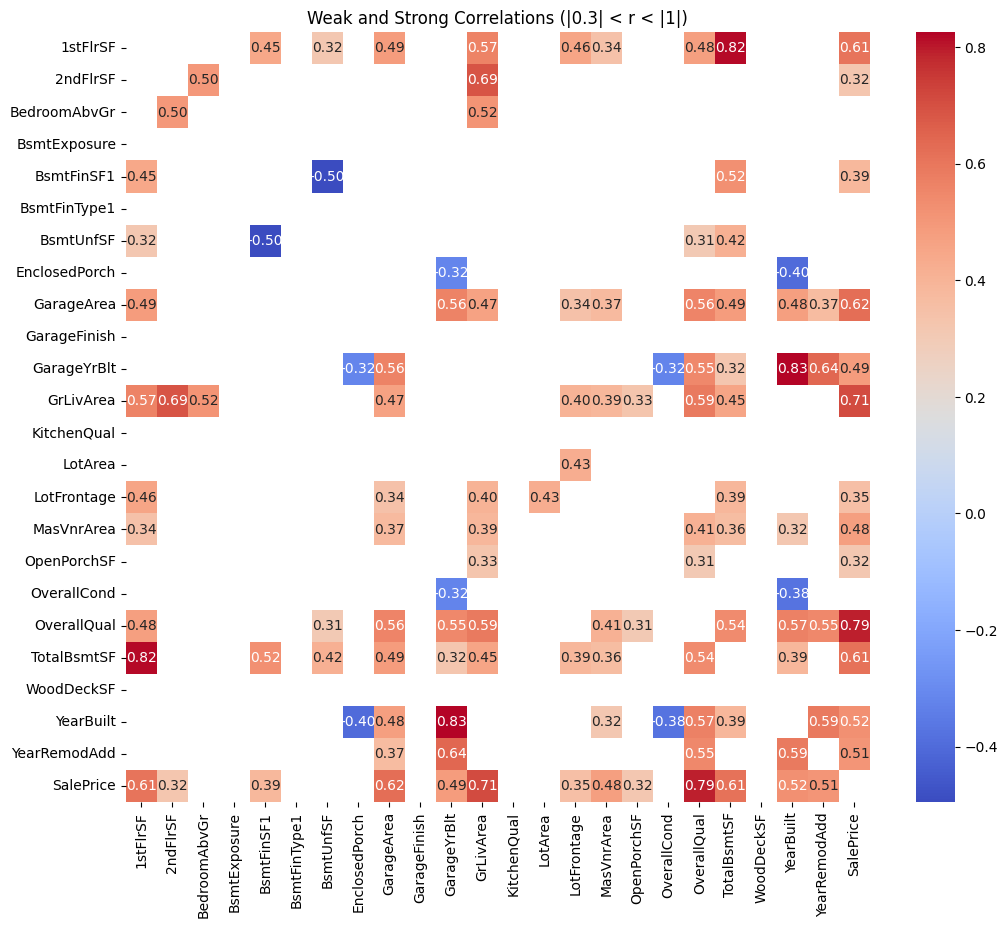

In [16]:
# Define the threshold for weak correlation
weak_threshold = 0.3

# Filter the correlation matrix to show both strong and weak correlations
correlations = correlation_matrix[(abs(correlation_matrix) > weak_threshold) & (abs(correlation_matrix) < 1)]

# Plot the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Weak and Strong Correlations (|0.3| < r < |1|)')
plt.show()


In [17]:
# Calculate correlation coefficient between "YearBuilt" and "SalePrice"
year_built_sale_price_corr = df['YearBuilt'].corr(df['SalePrice'])

print("Correlation coefficient between YearBuilt and SalePrice:", year_built_sale_price_corr)


Correlation coefficient between YearBuilt and SalePrice: 0.5228973328794969


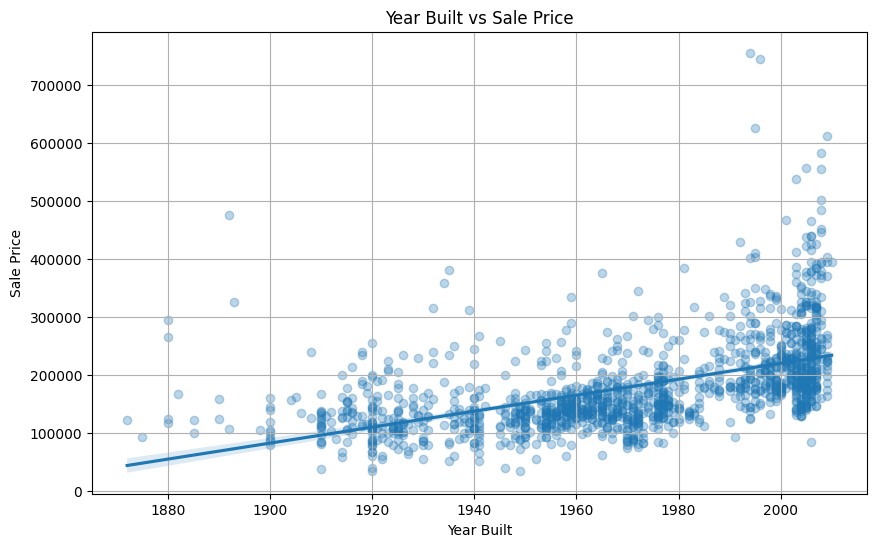

In [18]:
import seaborn as sns

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='YearBuilt', y='SalePrice', data=df, scatter_kws={'alpha':0.3})
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


In [24]:
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 154.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 59.4 MB/s eta 0:00:00:00:0100:01
